# Superconductivity

### Introduction

Superconductivity is the ability of certain materials to conduct electric current with practically zero resistance. This capacity produces interesting and potentially useful effects. For a material to behave as a superconductor, extreme low temperatures are required. Superconductivity was first observed in 1911 by Professor Heike Kamerlingh.

The goal of this project is to predict the critical temperature based on the features extracted.
Data source:https://archive.ics.uci.edu/ml/datasets/superconductivty+data

The ElasticNet regressor model was selected to predict the critical temperature of superconductors bacause the regressor has a built-in variable selection fitting procedures that was needed due to the high level of dimentions in the dataset.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from matplotlib.pyplot import figure
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')

### Data Exploration

In [2]:
df=pd.read_csv('train.csv')
total=pd.DataFrame((df.isnull().sum()))
print('total null values =',total.sum()[0])

total null values = 0


In [3]:
df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

### Data Visualization

A representative subset of the data was selected for graphing purposes due to the high dimentionality of the dataset

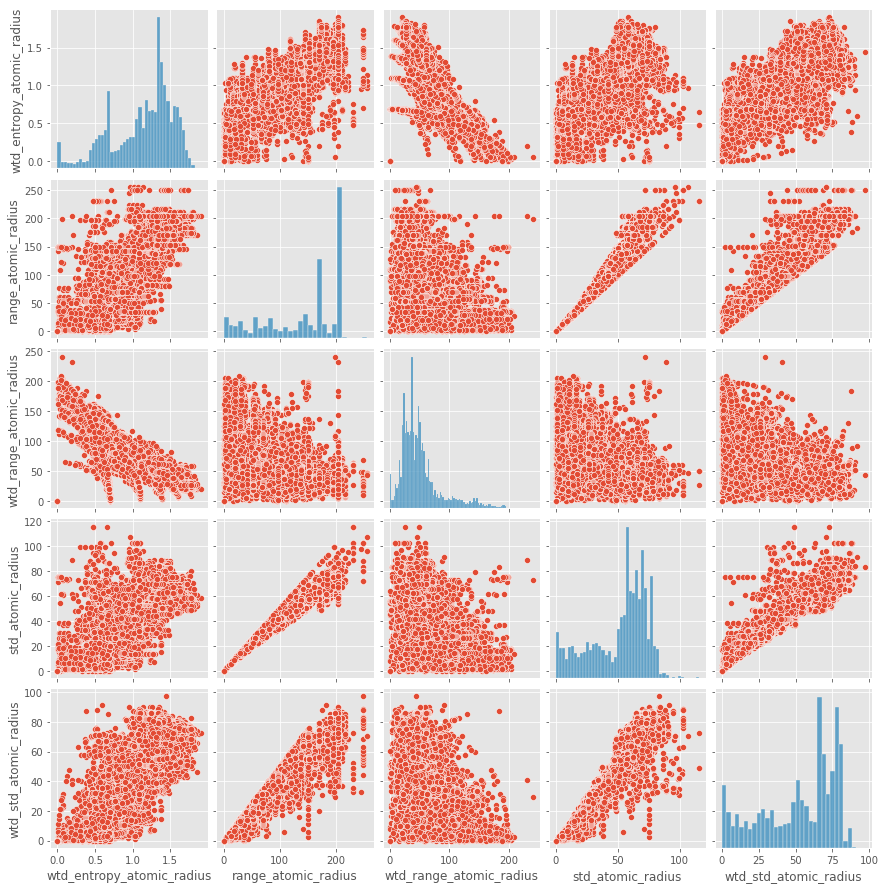

In [5]:
dfx=df.iloc[:,26:31]
sns.pairplot(dfx)

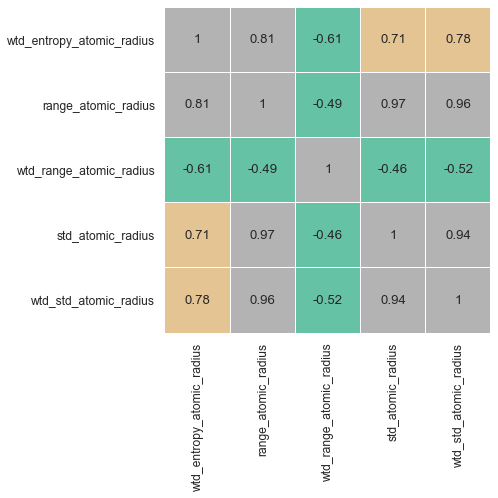

In [6]:
figure(figsize=(6, 6))
sns.set(font_scale=1.1)
sns.heatmap(dfx.corr(), square=True, annot=True, cmap='Set2', cbar=False, linewidths=0.1)
plt.show()

### Features Selection

In [7]:
X = df.iloc[:, :-1]
X=df.loc[:,df.columns!=('number_of_elements', 'range_Valence','range_atomic_radius')].values[:,1:]
y = df.iloc[:,-1:]
x=X.copy()
x=pd.DataFrame(x)
dfx=df.iloc[:,26:31]
X=pd.DataFrame(X)

### Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Model Training

In [9]:
regr = ElasticNet().fit(X_train, y_train)
print('Regression Coefficients:')
print("")
print(regr.coef_)
print("")
print("regression intercept:",regr.intercept_)

Regression Coefficients:

[ 0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  7.88838140e-06 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  3.68361631e-06  3.36132147e-06
 -8.20006428e-06 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  5.47517789e-06 -1.05864964e-06 -1.00215701e-05 -5.34911331e-06
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00

In [10]:
q_list=[]
for i in range(len(regr.coef_)):
    y=regr.coef_[i]
    if y!=0: 
        q = regr.coef_[i]
        q_list.append(q)        

In [11]:
q1=q_list[0]
q2=q_list[1]
q3=q_list[2]
q4=q_list[3]
q5=q_list[4]
q6=q_list[5]
q7=q_list[6]
q8=q_list[7]
q9=q_list[8]
q10=q_list[9]
e = regr.intercept_[0]

In [12]:
X2=list(range(20))
y2=list()
for i in (range(20)):
    X1=X2[i]   
    f=q1*X1+q2*X1+q3*X1+q4*X1+q5*X1+q6*X1+q7*X1+q8*X1+q9*X1+q10*X1-e
    y2.append(f)    

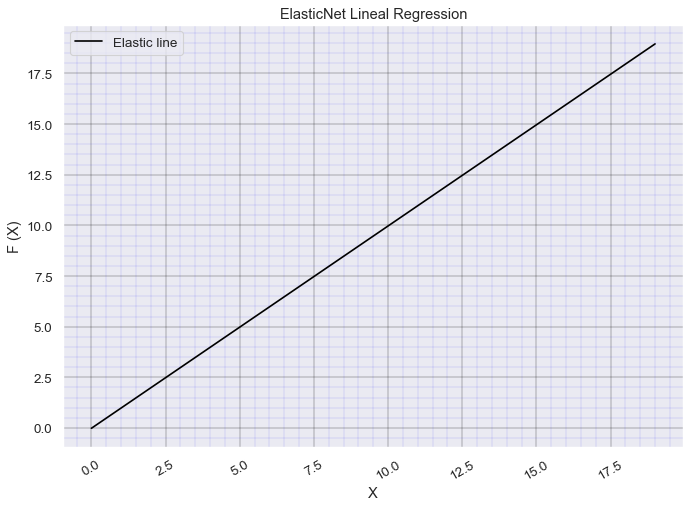

In [13]:
import matplotlib.pylab as plt
from matplotlib.pyplot import figure

figure(num=None, figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')

plt.plot(X2,y2, label="Elastic line", color='black')

plt.minorticks_on()
plt.grid(which='major', color='black', ls = '-', lw = 0.25)
plt.grid(which='minor', color='blue', ls = '-', lw = 0.10) 

plt.title('ElasticNet Lineal Regression')

plt.xlabel('X')
plt.ylabel('F (X)')
plt.legend(loc='best')

plt.xticks(rotation=30)
plt.show();

WE can see that the regression has a slope near one, which reduces the equation to its minimal expression of: y = mx-b

### Prediction and metrics

In [14]:
y_predict=regr.predict(X_test)
y_predict=pd.DataFrame(y_predict)
R2=regr.score(X_test, y_test)
mse = mean_squared_error(y_test,y_predict)
print("R square : %0.5f" % R2)
print("recall score : %0.5f" % regr.score(X_test, y_predict))
print("mean square error: %0.5f" % mse)

R square : 1.00000
recall score : 1.00000
mean square error: 0.00154


**Author:** **Jose H Chiriboga**, IBM Data Science student.
Copyright © Jose H Chiriboga 2022. This notebook and its source code are released under the terms of the MIT License.